In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf


In [23]:
MNIST=tf.keras.datasets.mnist
(train_data,train_labels),(test_data,test_labels)=MNIST.load_data()

AxesImage(size=(28, 28))
7


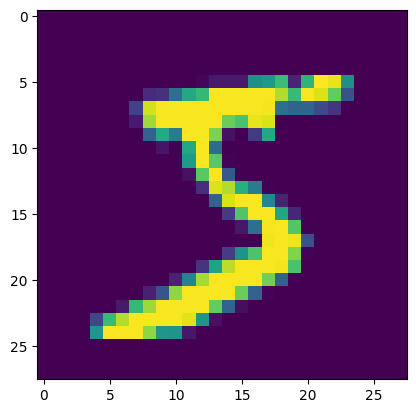

In [24]:
print(plt.imshow(train_data[0])),
print((test_labels[0]))

In [25]:
df_shapes = pd.DataFrame({
    "Dataset": ["Train", "Test"],
    "Examples": [train_data.shape[0], test_data.shape[0]],
    "Dimensions": [train_data.shape[1:], test_data.shape[1:]]
})

print(df_shapes)


  Dataset  Examples Dimensions
0   Train     60000   (28, 28)
1    Test     10000   (28, 28)


In [26]:
df_shapes = pd.DataFrame({
    "Dataset": ["Train_labels", "Test_labels"],
    "Examples": [train_labels.shape[0], test_labels.shape[0]],
    "Dimensions": [train_labels.shape[1:], test_labels.shape[1:]]
})
print(df_shapes)


        Dataset  Examples Dimensions
0  Train_labels     60000         ()
1   Test_labels     10000         ()


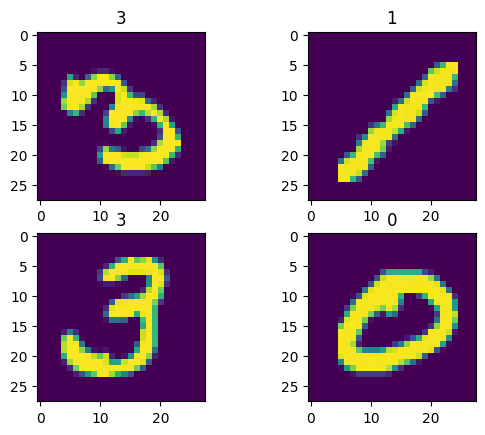

In [27]:
import random
for i in range(4):
    ax=plt.subplot(2,2,i+1)
    random_index=random.choice(range(len(train_data)))
    plt.imshow(train_data[random_index])
    plt.title(train_labels[random_index])


In [28]:
#normalizing the data
train_data_norm=tf.cast(train_data/255,dtype=tf.float16)
test_data_norm=tf.cast(test_data/255,dtype=tf.float16)

In [29]:
tf.random.set_seed(42)
# Model building
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="sigmoid"),
    tf.keras.layers.Dense(10,activation="softmax")
])
# model compiling
model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
                metrics=["Accuracy"]
               )
history_1 = model_1.fit( tf.expand_dims( train_data , axis=-1),
                       train_labels,
                       epochs=10,
                       validation_data=(test_data,test_labels))

Epoch 1/10
1875/1875 [==============================] - 12s 4ms/step - loss: 1.8314 - Accuracy: 0.3540 - val_loss: 1.5362 - val_Accuracy: 0.4767
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.4195 - Accuracy: 0.5010 - val_loss: 1.4103 - val_Accuracy: 0.5107
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.2329 - Accuracy: 0.5555 - val_loss: 1.2028 - val_Accuracy: 0.5655
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.1501 - Accuracy: 0.5864 - val_loss: 1.0948 - val_Accuracy: 0.6093
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.1175 - Accuracy: 0.5914 - val_loss: 1.0817 - val_Accuracy: 0.6174
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0725 - Accuracy: 0.6156 - val_loss: 1.0258 - val_Accuracy: 0.6289
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0539 - Accuracy: 0.6236 - val_loss: 1.0178 - val_Accuracy

In [30]:
y_pred_1 = model_1.predict(train_data_norm)


1875/1875 [==============================] - 3s 2ms/step


313/313 [==============================] - 1s 2ms/step


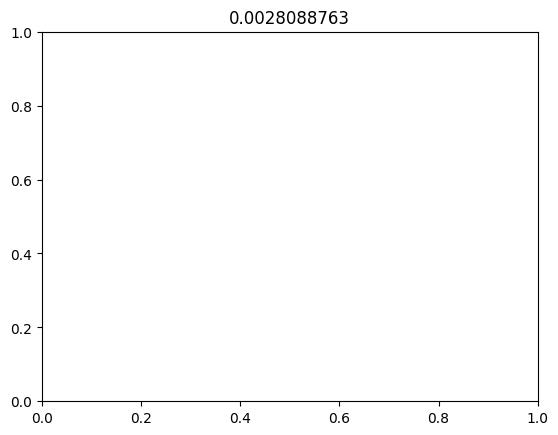

In [31]:
plt.title(y_pred_1[1,8])
predictions = model_1.predict(test_data_norm)

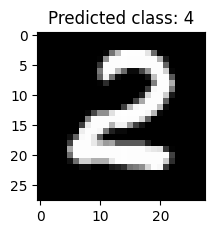

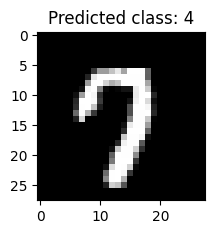

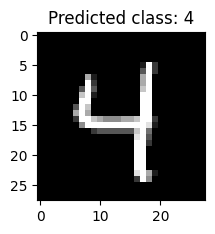

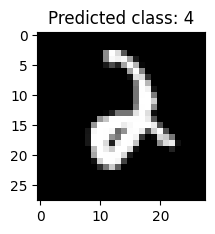

In [32]:
import random

for i in range(4):
    ax=plt.subplot(2,2,i+1)

    random_index = random.choice(range(len(test_data)))
    test_image = test_data_norm[random_index]
    predicted_class = np.argmax(predictions[random_index])

    plt.imshow(test_image, cmap='gray')  # MNIST images are grayscale
    plt.title(f'Predicted class: {predicted_class}')
    plt.show()



In [33]:
model_1.evaluate(test_data,test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 1.0275 - Accuracy: 0.6366


[1.0275310277938843, 0.6366000175476074]

<Axes: >

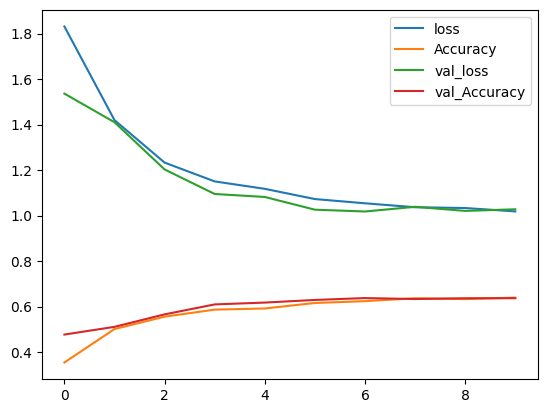

In [34]:
pd.DataFrame(history_1.history).plot()

## Modelbuilding with normalized data

In [35]:

tf.random.set_seed(42)
# Model building
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(32,activation="relu"),
    tf.keras.layers.Dense(32,activation="relu"),
    tf.keras.layers.Dense(32,activation="sigmoid"),
    tf.keras.layers.Dense(10,activation="softmax")
])
# model compiling
model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate = 0.01),
                metrics=["Accuracy"]
               )
history_2 = model_2.fit( tf.expand_dims( train_data_norm , axis=-1),
                       train_labels,
                       epochs=20 ,
                       validation_data=(test_data_norm,test_labels)
                       )

Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3392 - Accuracy: 0.9026 - val_loss: 0.2799 - val_Accuracy: 0.9192
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2368 - Accuracy: 0.9350 - val_loss: 0.2397 - val_Accuracy: 0.9330
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2309 - Accuracy: 0.9359 - val_loss: 0.2023 - val_Accuracy: 0.9447
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2214 - Accuracy: 0.9393 - val_loss: 0.2305 - val_Accuracy: 0.9370
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2235 - Accuracy: 0.9393 - val_loss: 0.2304 - val_Accuracy: 0.9370
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2332 - Accuracy: 0.9370 - val_loss: 0.2193 - val_Accuracy: 0.9406
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2359 - Accuracy: 0.9351 - val_loss: 0.2513 - val_Accuracy:

313/313 [==============================] - 1s 2ms/step


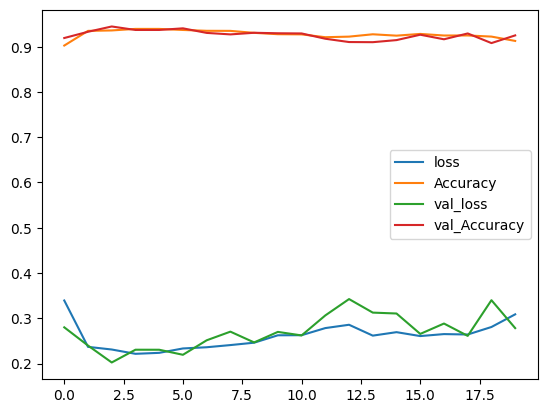

In [36]:
pd.DataFrame(history_2.history).plot()
predictions = model_2.predict(test_data_norm)

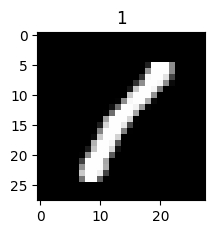

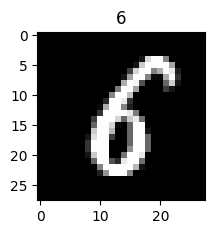

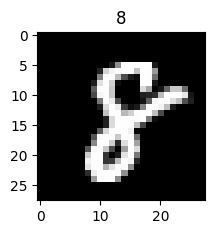

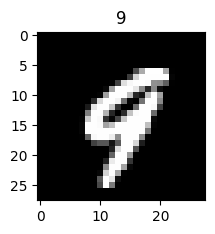

In [37]:
for i in range(4):
    ax=plt.subplot(2,2,i+1)

    random_index = random.choice(range(len(test_data)))
    test_image = test_data_norm[random_index]
    predicted_class = np.argmax(predictions[random_index])

    plt.imshow(test_image, cmap='gray')  # MNIST images are grayscale
    plt.title(predicted_class)
    plt.show()



In [38]:
# evaluat the model
test_loss,test_accuracy=model_2.evaluate(test_data_norm,test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.2782 - Accuracy: 0.9250


In [39]:
print(f"Test_Loss:\t{test_loss}\nTest_Accuracy:\t{test_accuracy*100}%")

Test_Loss:	0.27819210290908813
Test_Accuracy:	92.5000011920929%
